In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
df = pd.read_csv("House_Price.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    351 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [8]:
# !pip install statsmodels needs to be execute to use the following
# we are using statsmodels api to impleent a basic linear regresion modle
import statsmodels.api as sma

In [9]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [16]:
# creating an independant variable x as a constant
X = sma.add_constant(df['room_num'])  # creating a beta 0 like in the note

In [22]:
# simple linear regression 
# fitting the regression modwl with independant variable x
# dependant variable as df{price}
slrm = sma.OLS(df["price"], X).fit()

In [23]:
# getting the details after olsm model 
slrm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           1.31e-74
Time:                        17:21:46   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
"""the above OLSM can  be done not onbly fronm stats models library whereas it is most commonly done using scikitlearn library mebtioned below"""

'the above OLSM can  be done not onbly fronm stats models library whereas it is most commonly done using scikitlearn library mebtioned below'

In [7]:
#importing linear regression model in sklearn
# !pip install scikit-learn

from sklearn.linear_model import LinearRegression

In [8]:
y=df['price']

In [9]:
X = df[['room_num']]

In [10]:
slrm2 = LinearRegression()

In [12]:
slrm2.fit(X,y)

LinearRegression()

In [13]:
print(slrm2.intercept_, slrm2.coef_)

-34.659243123097184 [9.09966966]


In [14]:
help(slrm2)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |      speed

In [15]:
slrm2.predict(X)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

Help on JointGrid in module seaborn.axisgrid object:

class JointGrid(_BaseGrid)
 |  JointGrid(data=None, *, x=None, y=None, hue=None, height=6, ratio=5, space=0.2, palette=None, hue_order=None, hue_norm=None, dropna=False, xlim=None, ylim=None, marginal_ticks=False)
 |
 |  Grid for drawing a bivariate plot with marginal univariate plots.
 |
 |  Many plots can be drawn by using the figure-level interface :func:`jointplot`.
 |  Use this class directly when you need more flexibility.
 |
 |  Method resolution order:
 |      JointGrid
 |      _BaseGrid
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, data=None, *, x=None, y=None, hue=None, height=6, ratio=5, space=0.2, palette=None, hue_order=None, hue_norm=None, dropna=False, xlim=None, ylim=None, marginal_ticks=False)
 |      Set up the grid of subplots and store data internally for easy plotting.
 |
 |      Parameters
 |      ----------
 |      data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, 

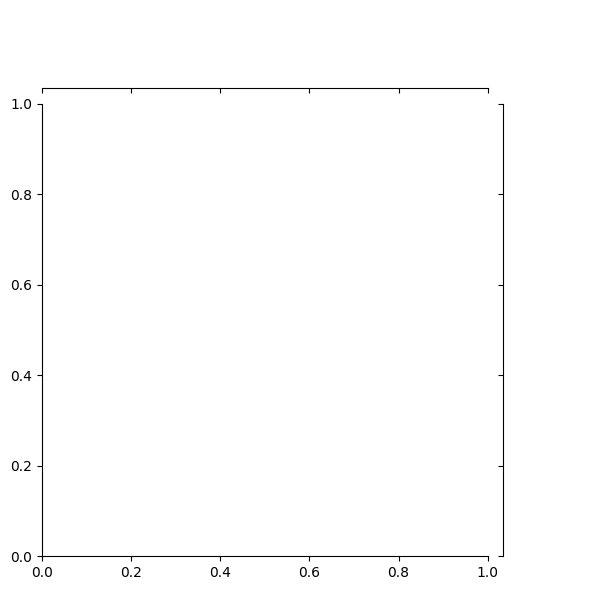

In [19]:
help(sns.jointplot())

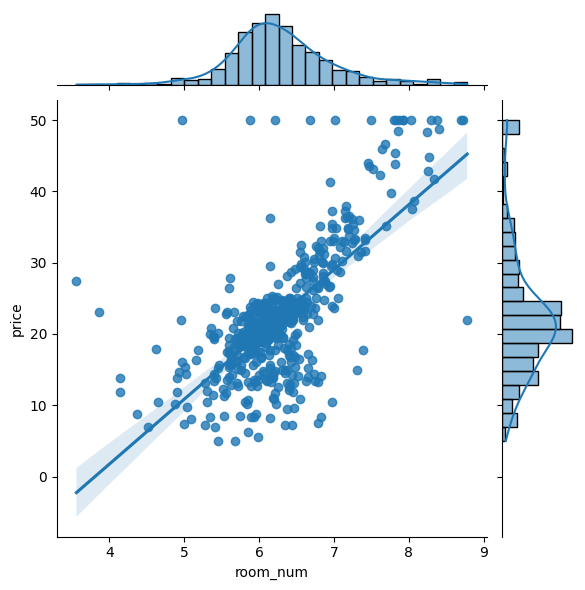

In [22]:
sns.jointplot(x=df["room_num"],y=df["price"], data=df, kind="reg")

In [ ]:
"""Interpreting results of a categorical variables in python"""